In [71]:
# Imports
import sunpy.map
from sunpy.coordinates import frames
from sunpy.coordinates import Heliocentric

import astropy.units as u
from astropy.coordinates import SkyCoord
import astropy.constants as const

import matplotlib.pyplot as plt

In [72]:
# Construct aia / stereo sunpy maps from fits
aia_map = sunpy.map.Map("./observations/aia_lev1_171a_2012_07_19t10_14_11_34z_image_lev1.fits") 
stereo_map = sunpy.map.Map("./observations/20120719_101400_n4eua.fts") 


In [73]:
# Extracting data from the map
time = aia_map.reference_coordinate.obstime         # Time of Observation
distance = aia_map.reference_coordinate.distance    # Distance from the observer to the Sun (1?)
observer = aia_map.reference_coordinate.observer    # Observer location (HGS)

# Define loop coordinates in hgs frame
r_1 = const.R_sun   # Solar radius
lat = -14*u.deg     # Latitude of loop in hgs
lon = 91*u.deg      # Longitude of loop in hgs

# Define various frames
hgs_frame = frames.HeliographicStonyhurst(obstime=time)     # Heliographic Stonyhurst frame
hcc_frame = Heliocentric(observer=observer, obstime=time)   # Heliocentric frame
hce_frame = frames.HeliocentricEarthEcliptic(obstime=time)  # Heliocentric Earth Ecliptic frame
hpj_frame = frames.Helioprojective(obstime=time,            # Helioprojective frame
                                   observer=observer)

# Define target coordinate as a center of AIA map in a helioprojective frame (???) ACTUALLY HGS
# hpj_coord = SkyCoord(lon=aia_map.center.Tx, lat=aia_map.center.Ty, radius=r_1, frame=hgs_frame)
hpj_coord = SkyCoord(Tx=aia_map.center.Tx, Ty=aia_map.center.Ty, distance=r_1, frame=hpj_frame)

In [74]:
# Loop coordinate in hgs frame
hgs_coord = SkyCoord(lon=lon, lat=lat, radius=r_1, frame=hgs_frame)  # longitude, latitude, and distance from the origin
flare_center_los_hgs = hgs_coord

# Create helioprojective point from AIA map center and transform it to HGS frame
hpj_point = frames.Helioprojective(Tx=aia_map.center.Tx, Ty=aia_map.center.Ty, distance=r_1, obstime=time, observer=observer)
hpj_coord_hgs = hpj_point.transform_to(hgs_frame)

# Define target coordinate as a center of AIA map in heliographic stonyhurst frame
map_center_hgs = SkyCoord(lon=hpj_coord_hgs.lon,
                          lat=hpj_coord_hgs.lat,
                          radius=r_1,
                          frame=hgs_frame)

# Manually define the position of the loop in helioprojective plane using transformation from HGS to HPJ frames
flare_los_prj = hgs_coord.transform_to(hpj_frame)
flare_aia_point = frames.Helioprojective(Tx=flare_los_prj.Tx,
                                         Ty=flare_los_prj.Ty,
                                         distance=r_1,
                                         obstime=time,
                                         observer=observer)
flare_aia_hgs = SkyCoord(lon=flare_aia_point.transform_to(hgs_frame).lon,
                          lat=flare_aia_point.transform_to(hgs_frame).lat,
                          radius=observer.radius,
                          frame=hgs_frame)

hpj_coord_hgs, flare_aia_hgs

(<HeliographicStonyhurst Coordinate (obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.01267226, 4.77420119, 1.51353676e+11)>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
     (0.01385512, 4.77391056, 1.52049376e+11)>)

In [75]:
# Get cartesian representation of loop coordinate in heliographic stonyhurst frame
hgs_coord_xyz = SkyCoord(flare_center_los_hgs, representation_type='cartesian')

# Get cartesian representation of map center in heliographic stonyhurst frame
map_center_hgs_xyz = SkyCoord(map_center_hgs, representation_type='cartesian')

hgs_coord_xyz, map_center_hgs_xyz  #, projected_flare_coord_xyz

(<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (-11780980.58539838, 6.74931926e+08, -1.68305063e+08)>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (6.93286208e+08, 153335.90836869, 57902512.6450285)>)

In [76]:
aia_coord_flare = flare_aia_hgs 
aia_coord_center = hpj_coord_hgs

# Convert helioprojective 0,0 coordinate to SkyCoord accounting for observer's position
#aia_coord_xyz = aia_coord #SkyCoord(aia_coord, representation_type='cartesian') .transform_to(frames.Heliocentric)
aia_coord_flare_xyz = SkyCoord(aia_coord_flare, representation_type='cartesian')
aia_coord_center_xyz = SkyCoord(aia_coord_center, representation_type='cartesian')
aia_coord_flare_xyz, aia_coord_center_xyz

(<SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (1.51521891e+11, 36640651.63217495, 1.26541702e+10)>,
 <SkyCoord (HeliographicStonyhurst: obstime=2012-07-19T10:14:11.340, rsun=695700.0 km): (x, y, z) in m
     (1.50828541e+11, 33359139.64139567, 1.25970363e+10)>)

In [77]:
# Combine the coordinate components into lists that define the rays to be plotted

# aia_coord_flare_xyz
x = [aia_coord_flare_xyz.x, hgs_coord_xyz.x]
y = [aia_coord_flare_xyz.y, hgs_coord_xyz.y]
z = [aia_coord_flare_xyz.z, hgs_coord_xyz.z]

# Define x1, y1, z1 as l.o.s. components of a ray connecting center of the solar disk and SDO observer location

#aia_coord_center_xyz
x1 = [aia_coord_center_xyz.x, map_center_hgs_xyz.x]
y1 = [aia_coord_center_xyz.y, map_center_hgs_xyz.y]
z1 = [aia_coord_center_xyz.z, map_center_hgs_xyz.z]

(x, y, z), (x1, y1, z1), aia_coord_flare_xyz.y, aia_coord_flare_xyz.y

(([<Quantity 1.51521891e+11 m>, <Quantity -11780980.58539838 m>],
  [<Quantity 36640651.63217495 m>, <Quantity 6.74931926e+08 m>],
  [<Quantity 1.26541702e+10 m>, <Quantity -1.68305063e+08 m>]),
 ([<Quantity 1.50828541e+11 m>, <Quantity 6.93286208e+08 m>],
  [<Quantity 33359139.64139567 m>, <Quantity 153335.90836869 m>],
  [<Quantity 1.25970363e+10 m>, <Quantity 57902512.6450285 m>]),
 <Quantity 36640651.63217495 m>,
 <Quantity 36640651.63217495 m>)

In [78]:
# Find the equation of the line to extend the ray past the loop

# <x, y, z> = <x0, y0, z0> + t * <mx, my, mz>
# <mx, my, mz> = (<x, y, z> - <x0, y0, z0>) / t     # t can be any number, e.g. 1
# <mx, my, mz> = <x-x0, y-y0, z-z0> 

dx = x[1] - x[0]        # Components of the derivative
dy = y[1] - y[0]
dz = z[1] - z[0]

t = 2                   # Change the length of the ray with any factor   
px = x[0] + t * dx      # Components of the new point
py = y[0] + t * dy
pz = z[0] + t * dz

x2 = [x[0], px]         # Construct the ray using origin (AIA) and new point
y2 = [y[0], py]
z2 = [z[0], pz]

(x2, y2, z2)

([<Quantity 1.51521891e+11 m>, <Quantity -1.51545453e+11 m>],
 [<Quantity 36640651.63217495 m>, <Quantity 1.3132232e+09 m>],
 [<Quantity 1.26541702e+10 m>, <Quantity -1.29907803e+10 m>])

In [79]:
# Pass the los ray values into SkyCoord object

los = SkyCoord(
    x=[x[0].value, x[1].value] * u.m,
    y=[y[0].value, y[1].value] * u.m,
    z=[z[0].value, z[1].value] * u.m,
    representation_type='cartesian',
    frame=hgs_frame
)

los1 = SkyCoord(
    x=x1, 
    y=y1,
    z=z1,
    representation_type='cartesian',
    frame=hgs_frame
)

los2 = SkyCoord(
    x=[x2[0].value, x2[1].value] * u.m,
    y=[y2[0].value, y2[1].value] * u.m,
    z=[z2[0].value, z2[1].value] * u.m,
    representation_type='cartesian',
    frame=hgs_frame
)

(x[0].value, x[1].value), (y[0].value, y[1].value), (z[0].value, z[1].value)

((151521891100.54178, -11780980.585398383),
 (36640651.63217495, 674931925.7101965),
 (12654170219.372608, -168305062.76868883))

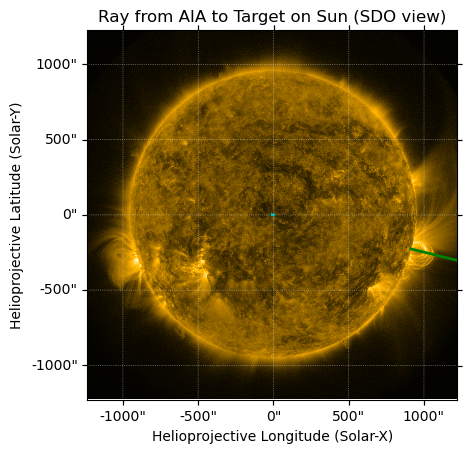

In [80]:
# Plot the aia map with the AIA line of sight

fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)

# ax.plot_coord(los.transform_to(hpj_frame), color='r', lw=2)
ax.plot_coord(los1.transform_to(hpj_frame), color='c', lw=2)
ax.plot_coord(los2.transform_to(hpj_frame), color='g', lw=2)
aia_map.plot(axes=ax)

ax.set_title("Ray from AIA to Target on Sun (SDO view)")
plt.show()

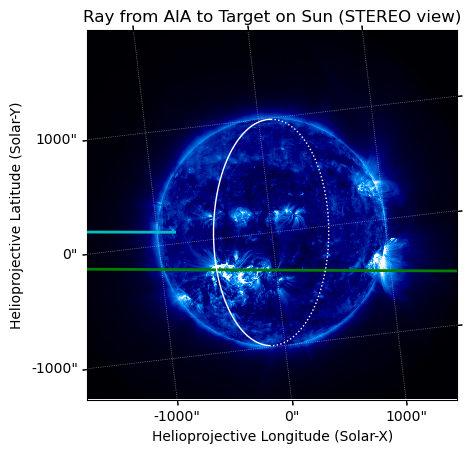

In [83]:
# Plot the stereo map with the AIA line of sight

fig = plt.figure()
ax = fig.add_subplot(projection=stereo_map)

full_ray = False    # Toggle plotting full ray from AIA through loop
if full_ray:
    stereo_map.plot(axes=ax)
    # ax.plot_coord(los.transform_to(hpj_coord), color='r', lw=2)
    ax.plot_coord(los1.transform_to(hpj_coord), color='c', lw=2)
    ax.plot_coord(los2.transform_to(hpj_frame), color='g', lw=2)
else:
    # ax.plot_coord(los.transform_to(hpj_coord), color='r', lw=2)
    ax.plot_coord(los1.transform_to(hpj_coord), color='c', lw=2)
    ax.plot_coord(los2.transform_to(hpj_frame), color='g', lw=2)
    stereo_map.plot(axes=ax)

visible, hidden = aia_map.draw_limb(axes=ax)

ax.set_title("Ray from AIA to Target on Sun (STEREO view)")
plt.show()